# Parameter Estimation
> 张蔚桐   Weitong Zhang    2015011493    zwt15@mails.tsinghua.edu.cn

## MLE and MAP

> Since this task is mentioned in the previous one, we just copy from the previous homework

1. MLE for the uniform distribution

    1. 
    
    Consider $l(\theta) = \sum_{i=1}^n\log f(x_i|\theta)$, to make $l(\theta) > -\infty, f(x_i|\theta) > 0$, therefore, we get $a \ge \max |x_i|$. 
    
    In this case, $l(\theta) = \frac{n}{2a}\le \frac{n}{2\max |x_i|}$, where $\hat a = \max |x_i|$
    <br></br>
    <br></br>
    - 
    
    $$\begin{cases}
    0\text{ , if  } |x_{n+1}| > \hat a\\
    \frac 1 {2\hat a} \text{ , if else} \end{cases}$$
    <br></br>
    <br></br>
    - 
    
    Consider $x_1 \le x_2 \le \cdots \le x_n$, we can find out that the $\hat a$ is only related to $x_1,x_n$, that is to say, the information of $x_2,\cdots,x_{n-1}$ is wasted. Meanwhile, if the dataset has some data which is error or rare, for example, a very big $x_n$, the $\hat a$ is easily influenced by this point, in a few words, the model is too sensitive to the singular input.
    
    It is better to use other method, such as method of moments to get $\hat a$, for instance, taking the following equation into cosideration:
    
    $$\mathrm {Var}(X) \approx \frac{a^2}{3} \Rightarrow \hat a = \sqrt{3\mathrm {Var}(X)}$$ where $\mathrm {Var}(X)$ is the variance of all of the data provided
    
    OR, another approach is to reshape the PDF into a relatively smooth function, for example, instead of the incontinuous function function, use the following function might seems to be a good idea:
    
    $$f(x) = C(\mathrm{sigmoid}(a-|x|))/a,   \mathrm{sigmoid}(x) = \frac{1}{1+\exp(-\sigma x)}$$
    
    where $\sigma$ might be determined manually, $C$ should be a constant for normalization, in this case, the MLE method should also be OK
<br></br>
<br></br>
- MLE for model $t = y(x,\mathbf w) + \epsilon$

    1. 
    
    $p(\mathbf T|\mathbf X,\mathbf w,\beta) = \prod \sqrt{\frac{\beta}{2\pi}}\exp(-0.5\beta(t_n - y(x_n,\mathbf w))^2) $, therefore, we get $l(\mathbf w) = n\log\sqrt{\frac\beta{2\pi}} - 0.5\beta \sum (t_n - y(x_n,\mathbf w))^2$. It is obvious that $\max l(\mathbf w) \Leftrightarrow \min \sum (t_n - y(x_n,\mathbf w))^2$, which is equivalent to the problem of minimizing the sum of the square error
    <br></br>
    <br></br>
    - 
    
    Taking the MAP method into consideration: $\max l(\theta) + \log p(\theta)$, therefore we got the objective function is that: $q(\mathbf w ) = n\log\sqrt{\frac\beta{2\pi}} - 0.5\beta \sum (t_n - y(x_n,\mathbf w))^2 + \frac{\alpha}{\sqrt{2\pi}} -0.5 \alpha (\mathbf w)^2$, we can find out that $\max q(\mathbf w) \Leftrightarrow \min \beta \sum (t_n - y(x_n,\mathbf w))^2 + \alpha (\mathbf w)^2 \Leftrightarrow \min 0.5\sum (t_n - y(x_n,\mathbf w))^2 + 0.5\frac\alpha\beta (\mathbf w)^2$, by set $\lambda = \frac \alpha \beta$, we can conclude that $\max q(\mathbf w) \Leftrightarrow \min E(\mathbf w)$

## Programming

#### Sampling

We use numpy in python to generate the sample of $p(x)$

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

def sample(n):
    return 0.2 * np.random.normal(-1,1,n) + 0.8 * np.random.normal(1,1,n)

### Uniform Distribution as Parzon Window

#### Estimation of PDF

We plot the PDF from -5 to 5, and we provide two solver: brute one and a relativly smart one, the brute one is the regular sum of the $p(x)$

In [2]:
def est_pdf_point(n,a,x,samples):
    p = 0
    for s in samples:
        if np.abs(x - s) <= 0.5 * a:
            p = p + 1.0
    p = p / n / a
    return p
def est_pdf_plot(a,samples):
    X = np.linspace(-5,5,num= 1 + 1000)
    y = []
    n = len(samples)
    for x in X:
        y.append(est_pdf_point(n,a,x,samples))
    return X,y

Now it is interesting to implement a smarter one, which is only $\mathcal O(n\log n)$ in complexity instead of $\mathcal O(n^2)$, as a trade off, the interval of the $X$ should be smaller.

In [3]:
def smart_pdf(a,samples):
    n = len(samples)
    X = np.linspace(-5,5,num= int(1 + 1e6))
    U = samples - 0.5 * a
    D = samples + 0.5 * a
    U = np.concatenate((np.reshape(U,(1,n)),np.ones((1,n))),axis = 0)
    D = np.concatenate((np.reshape(D,(1,n)), -1 * np.ones((1,n))),axis = 0)
    S = np.concatenate((U,D),axis = 1)
    S = S.T[np.lexsort(S[::-1,:])]
    idx = 0
    y = []
    for x in X:
        if len(y) == 0 or idx == 2 * n:
            y.append(0)
        elif x >= S[idx,0]:
            y.append(y[-1] + S[idx,1])
            idx = idx + 1
        else:
            y.append(y[-1])
    y = np.array(y).astype(np.float32) / n / a
    return X,y

Now lets do a little more job to illustrate these two functions are almost the same. To accerlate the calc speed, we use only 5 samples and 10,000 samples

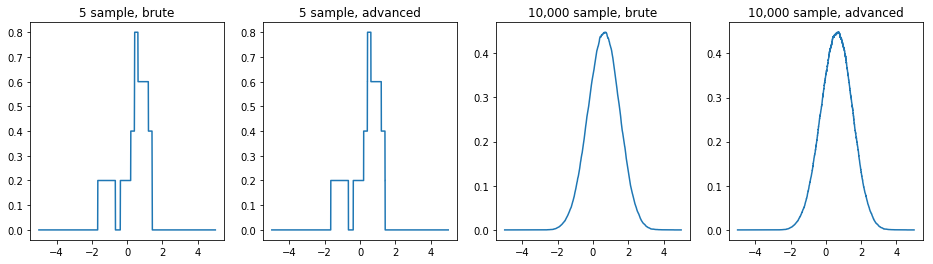

In [4]:
plt.rcParams["figure.figsize"] = [16,4]
S = sample(5)
X_1,Y_1 = est_pdf_plot(1,S)
X_2,Y_2 = smart_pdf(1,S)
plt.subplot(1,4,1)
plt.plot(X_1,Y_1)
plt.title('5 sample, brute')
plt.subplot(1,4,2)
plt.plot(X_2,Y_2)
plt.title('5 sample, advanced')
S = sample(10000)
X_1,Y_1 = est_pdf_plot(1,S)
X_2,Y_2 = smart_pdf(1,S)
plt.subplot(1,4,3)
plt.plot(X_1,Y_1)
plt.title('10,000 sample, brute')
plt.subplot(1,4,4)
plt.plot(X_2,Y_2)
plt.title('10,000 sample, advanced')
plt.show()

#### Original PDF

$p(x) \sim 0.2 N(-1,1) + 0.8 N(1,1) \sim N(-0.2,0.04) + N(0.8,0.64)$, the two normal distribution are independent to each other, so $X\sim N(0.6,0.68)$, therefore, we set the parameters for this PDF

In [5]:
_X = np.linspace(-5,5,num= int(1 + 1e6))
sigma = 0.68
mu = 0.6
_Y = 1.0 / np.sqrt(2 * np.pi * sigma) * np.exp(-0.5 * np.square(_X -mu)  / sigma) 
N = [5,10,50,100,500,1000,5000,10000]
A = [0.05,0.10,0.50,1,5]

#### Calc the error

$$\epsilon(p_n(x)) = \int [p_n(x) - p(x)]^2 \mathrm dx = \int p_n^2(x) - 2p_n(x)p(x) + p^2(x) \mathrm dx = \int p_n^2(x) - 2p_n(x)p(x) + \mathrm dx + \int \frac1{2\pi\sigma^2}\exp(-\frac{(x-\mu)^2}{\sigma^2}) \mathrm dx$$

$$\int \frac1{2\pi\sigma^2}\exp(-\frac{(x-\mu)^2}{\sigma^2}) \mathrm dx = \int \frac1{2\pi\sigma}\exp(-x^2) \mathrm dx = \frac1{2\sqrt{\pi\sigma^2} }$$

$$p_n(x) = \frac1{an}\sum[u(x - x_i + 0.5a) - u(x - x_i - 0.5a)]$$

$$\int2p_n(x)p(x)\mathrm dx = \int\frac2{an}\sum[u(x - x_i + 0.5a) - u(x - x_i - 0.5a)]p(x)\mathrm dx = \frac2{an}\sum\int_{x_i-0.5a}^{x_i+0.5a} p(x)\mathrm dx $$

$$\int2p_n(x)p(x)\mathrm dx= \frac2{an}\sum(\Phi(\frac{x_i+0.5a-\mu}{\sigma}) - \Phi(\frac{x_i-0.5a-\mu}{\sigma}))$$

$\int p_n^2(x)\mathrm dx$ is too difficult to get an analytical solution, however, we could get the numerial solutionly easily as following code

Also, calc the error based on the rudimentary numerial method directly is also possible, we will implement it for double check

In [6]:
def error(samples,a):
    # item 1
    n = len(samples)
    U = samples - 0.5 * a
    D = samples + 0.5 * a
    U = np.concatenate((np.reshape(U,(1,n)),np.ones((1,n))),axis = 0)
    D = np.concatenate((np.reshape(D,(1,n)), -1 * np.ones((1,n))),axis = 0)
    S = np.concatenate((U,D),axis = 1)
    S = S.T[np.lexsort(S[::-1,:])]
    value = 0.0
    intg = S[0,1]
    for idx in range(1,len(S)):
        value = value + intg * intg * (S[idx,0] - S[idx-1,0])
        intg = intg + S[idx,1]
    value = value / a / a / n / n
    # item 2
    delta = np.sum(stats.norm.cdf(samples + 0.5 * a,mu,np.sqrt(sigma))) - np.sum(stats.norm.cdf(samples - 0.5 * a,mu,np.sqrt(sigma)))
    # item 3
    value = value - 2.0 / a / n * delta + 0.5 / np.sqrt(np.pi * sigma)
    return value


#### Loop in $N$ and $a$

We plot the PDF for estimations $n = 5,\cdots ,10000$ and $a = 0.05,\cdots 5$ as the blue curve while the real PDF is shown in the red

The error calculated by two method are both shown in the graph

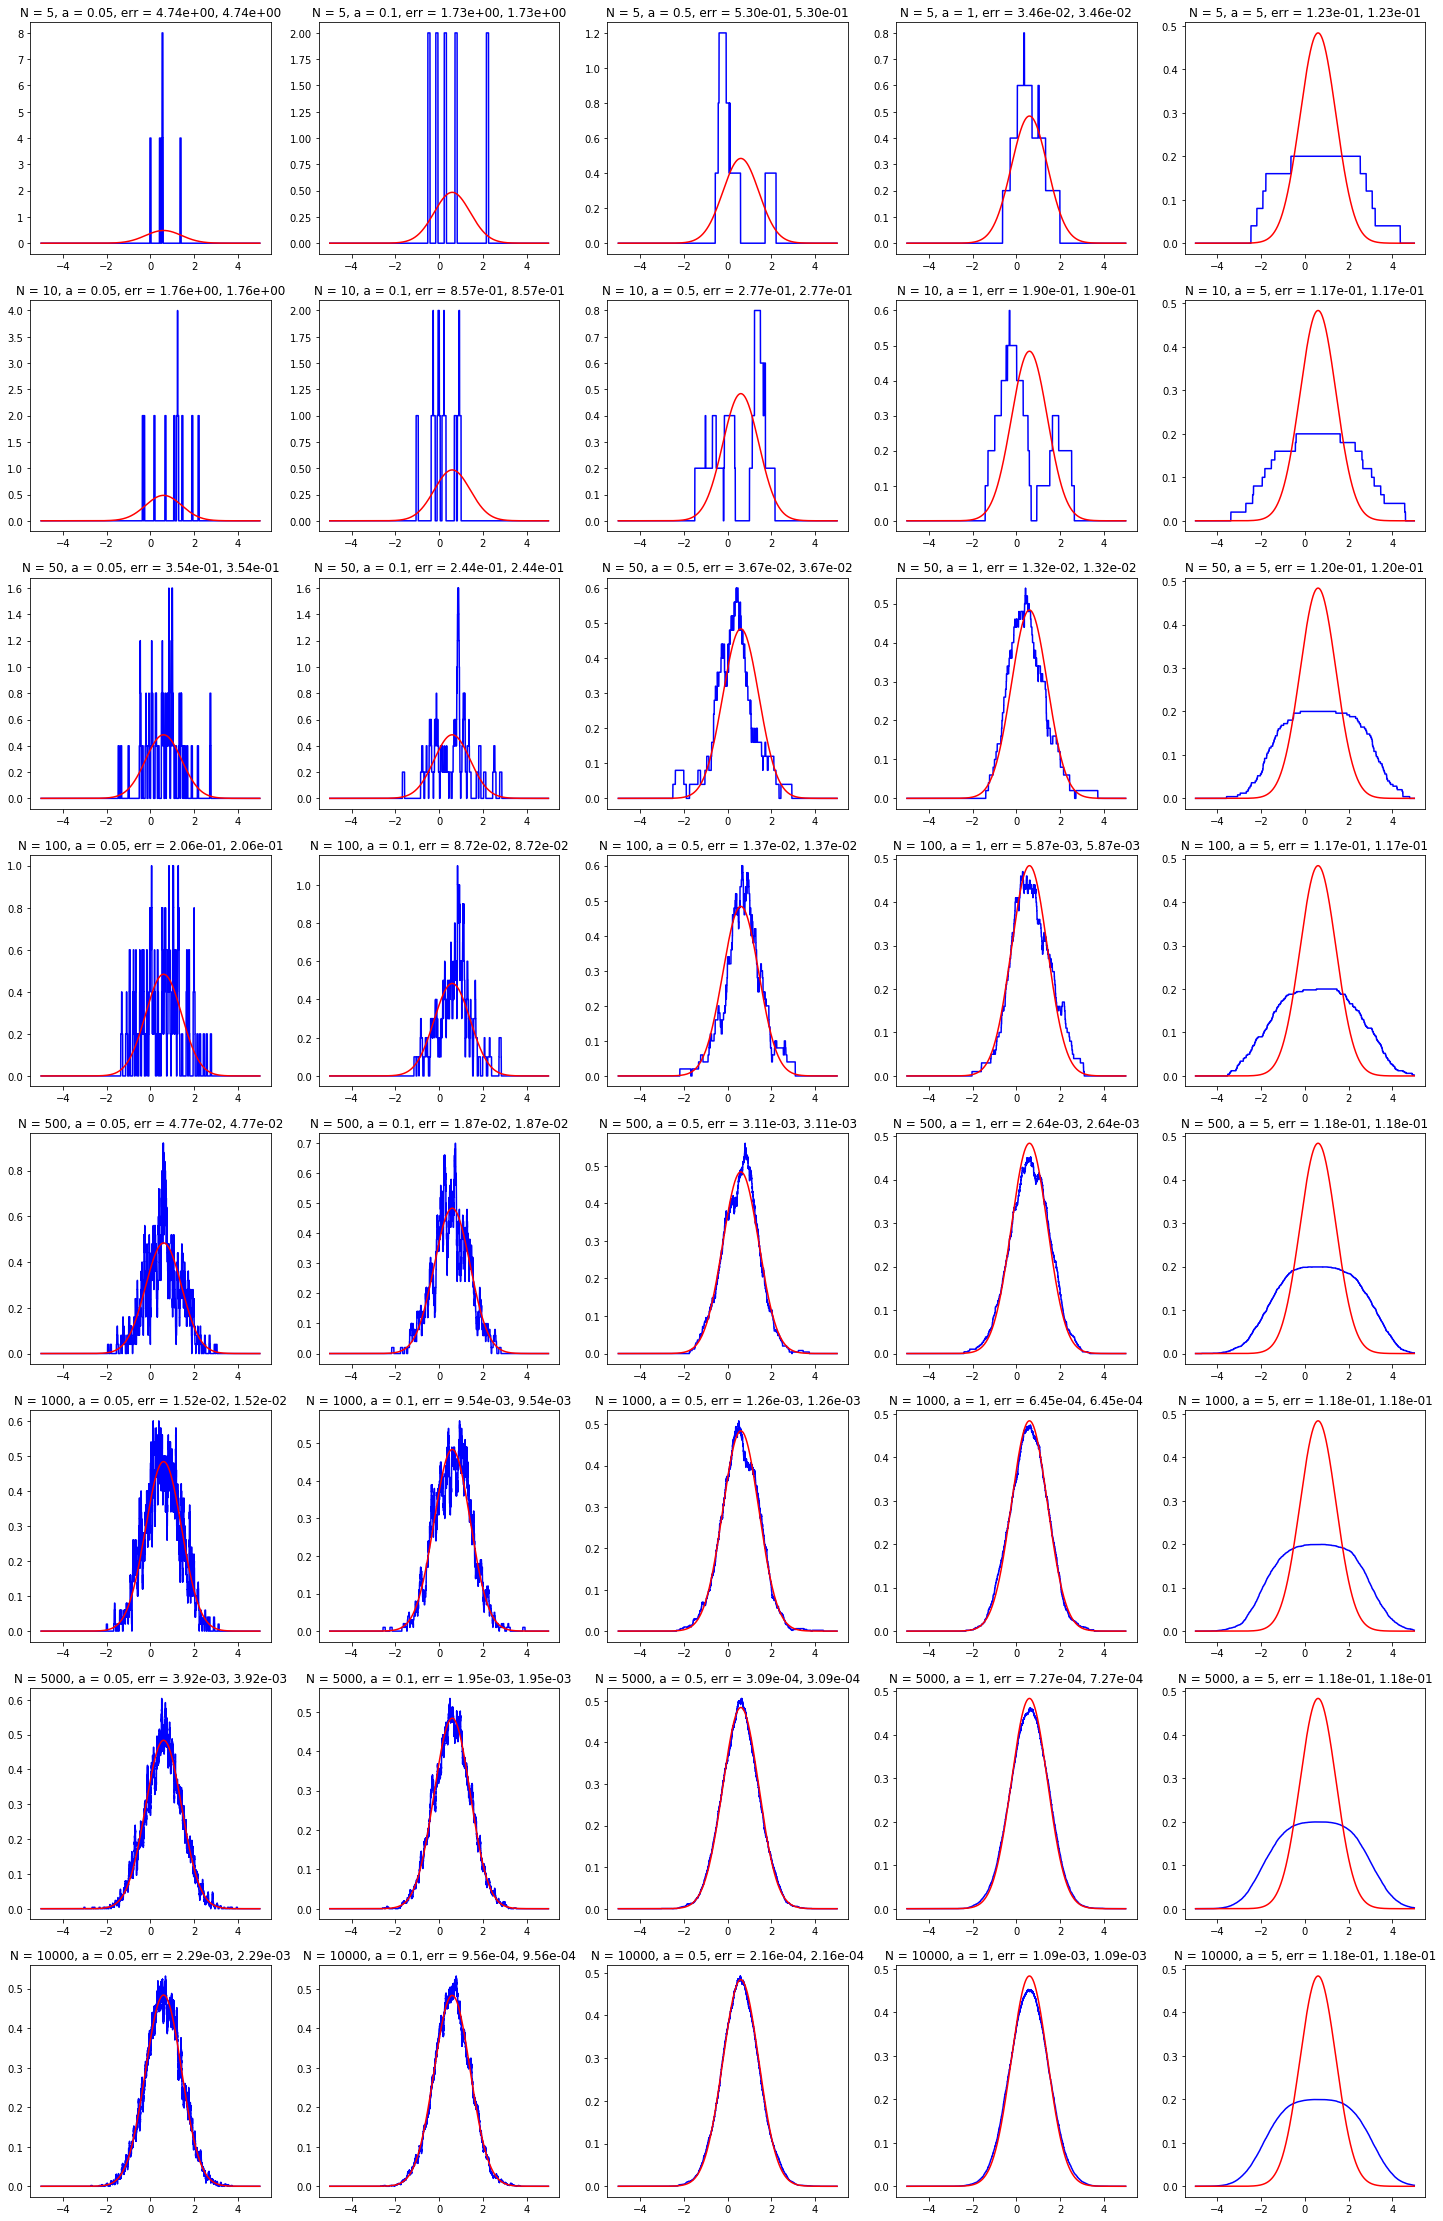

In [7]:
plt.rcParams["figure.figsize"] = [5 * len(A),5 * len(N)]
def PDF(n,a):
    samples = sample(n)
    err = error(samples,a)
    return smart_pdf(a,samples),err
for n in range(len(N)):
    for a in range(len(A)):
        plt.subplot(len(N),len(A),n * len(A) + a + 1)
        [X,Y],e = PDF(N[n],A[a])
        err = np.square(Y - stats.norm.pdf( X,mu,np.sqrt(sigma)))
        err = np.sum(err) * (X[1] - X[0])
        plt.plot(X,Y,'b')
        plt.plot(_X,_Y,'r')
        plt.title('N = {}, a = {}, err = {:.2e}, {:.2e}'.format(N[n],A[a],e,err))
plt.show()

#### $E(\epsilon(x))$ and $Var(\epsilon(x))$ in different $N$ and $a$

Firstly, lets review the $\epsilon(x)$

$$\epsilon(p_n(x)) = \int [p_n(x) - p(x)]^2 = \int p_n^2(x)\mathrm dx - \frac2{an}\sum(\Phi(\frac{x_i+0.5a-\mu}{\sigma}) - \Phi(\frac{x_i-0.5a-\mu}{\sigma})) + \frac1{2\sqrt{\pi\sigma^2} }$$

After several trials, we have found out that there are almost no analytical solution to the problem. Therefore, we have to use numerial method to calc the $E(\epsilon(x))$ and $Var(\epsilon(x))$

In [8]:
string = 'Mean Value of Error\n N \\ a'
for a in A: string += '\t\t' + str(a)
print (string)

loop_num = 100
buf = []
for n in N:
    string = str(n) + '\t'
    for a in A:
        err = []
        for _ in range(loop_num):
            samples = sample(n)
            e = error(samples,a)
            err.append(e)
        string += '\t' + '{:.3e}'.format(np.mean(err))
        buf.append(np.sqrt(np.var(err,ddof=1)))
    print (string)
    
idx = 0
string = 'Standard Variance of Error\n N \\ a'
for a in A: string += '\t\t' + str(a)
print (string)
for n in N:
    string = str(n) + '\t'
    for a in A:
        string += '\t' + '{:.3e}'.format(buf[idx])
        idx += 1
    print (string)

Mean Value of Error
 N \ a		0.05		0.1		0.5		1		5
5		3.912e+00	1.940e+00	3.220e-01	1.357e-01	1.245e-01
10		1.979e+00	9.623e-01	1.745e-01	6.939e-02	1.206e-01
50		3.895e-01	2.006e-01	3.334e-02	1.364e-02	1.188e-01
100		1.986e-01	9.706e-02	1.747e-02	7.232e-03	1.180e-01
500		3.929e-02	1.937e-02	3.218e-03	2.394e-03	1.178e-01
1000		1.976e-02	9.765e-03	1.889e-03	1.565e-03	1.177e-01
5000		3.890e-03	1.882e-03	3.924e-04	9.970e-04	1.177e-01
10000		1.965e-03	9.693e-04	2.334e-04	9.484e-04	1.177e-01
Standard Variance of Error
 N \ a		0.05		0.1		0.5		1		5
5		4.693e-01	3.731e-01	1.481e-01	8.241e-02	6.065e-03
10		2.782e-01	2.037e-01	7.328e-02	5.022e-02	3.739e-03
50		5.479e-02	4.487e-02	1.494e-02	6.975e-03	1.940e-03
100		2.657e-02	2.072e-02	7.894e-03	5.420e-03	9.864e-04
500		6.561e-03	4.382e-03	1.370e-03	1.690e-03	5.369e-04
1000		3.073e-03	2.159e-03	8.691e-04	8.675e-04	3.099e-04
5000		6.131e-04	3.631e-04	1.823e-04	3.598e-04	1.423e-04
10000		2.893e-04	1.821e-04	1.113e-04	2.379e-04	1.181e-04


#### Choosing $a$ based on $n$

From the aboe empirical experiences, we can conclude that no matter what n is chosen, $a=0.5$ is always the best choice among all of the a given in list $A$, for the reason that $a = 0.5$ have lower error expectation and variance. We can conjecture that $a \sim \sigma$ would be a good choice for $a$

### Normal Distribution as Parzon Window

#### re-implement the code above

We found that the faster way to calc the $p_n(x)$ is no more work in this situation, so we have to re-implement the code above. In addition, we use the width of uniform distribution $a$ as the standard variance of normal window function. 

The error rate could be calculated by 

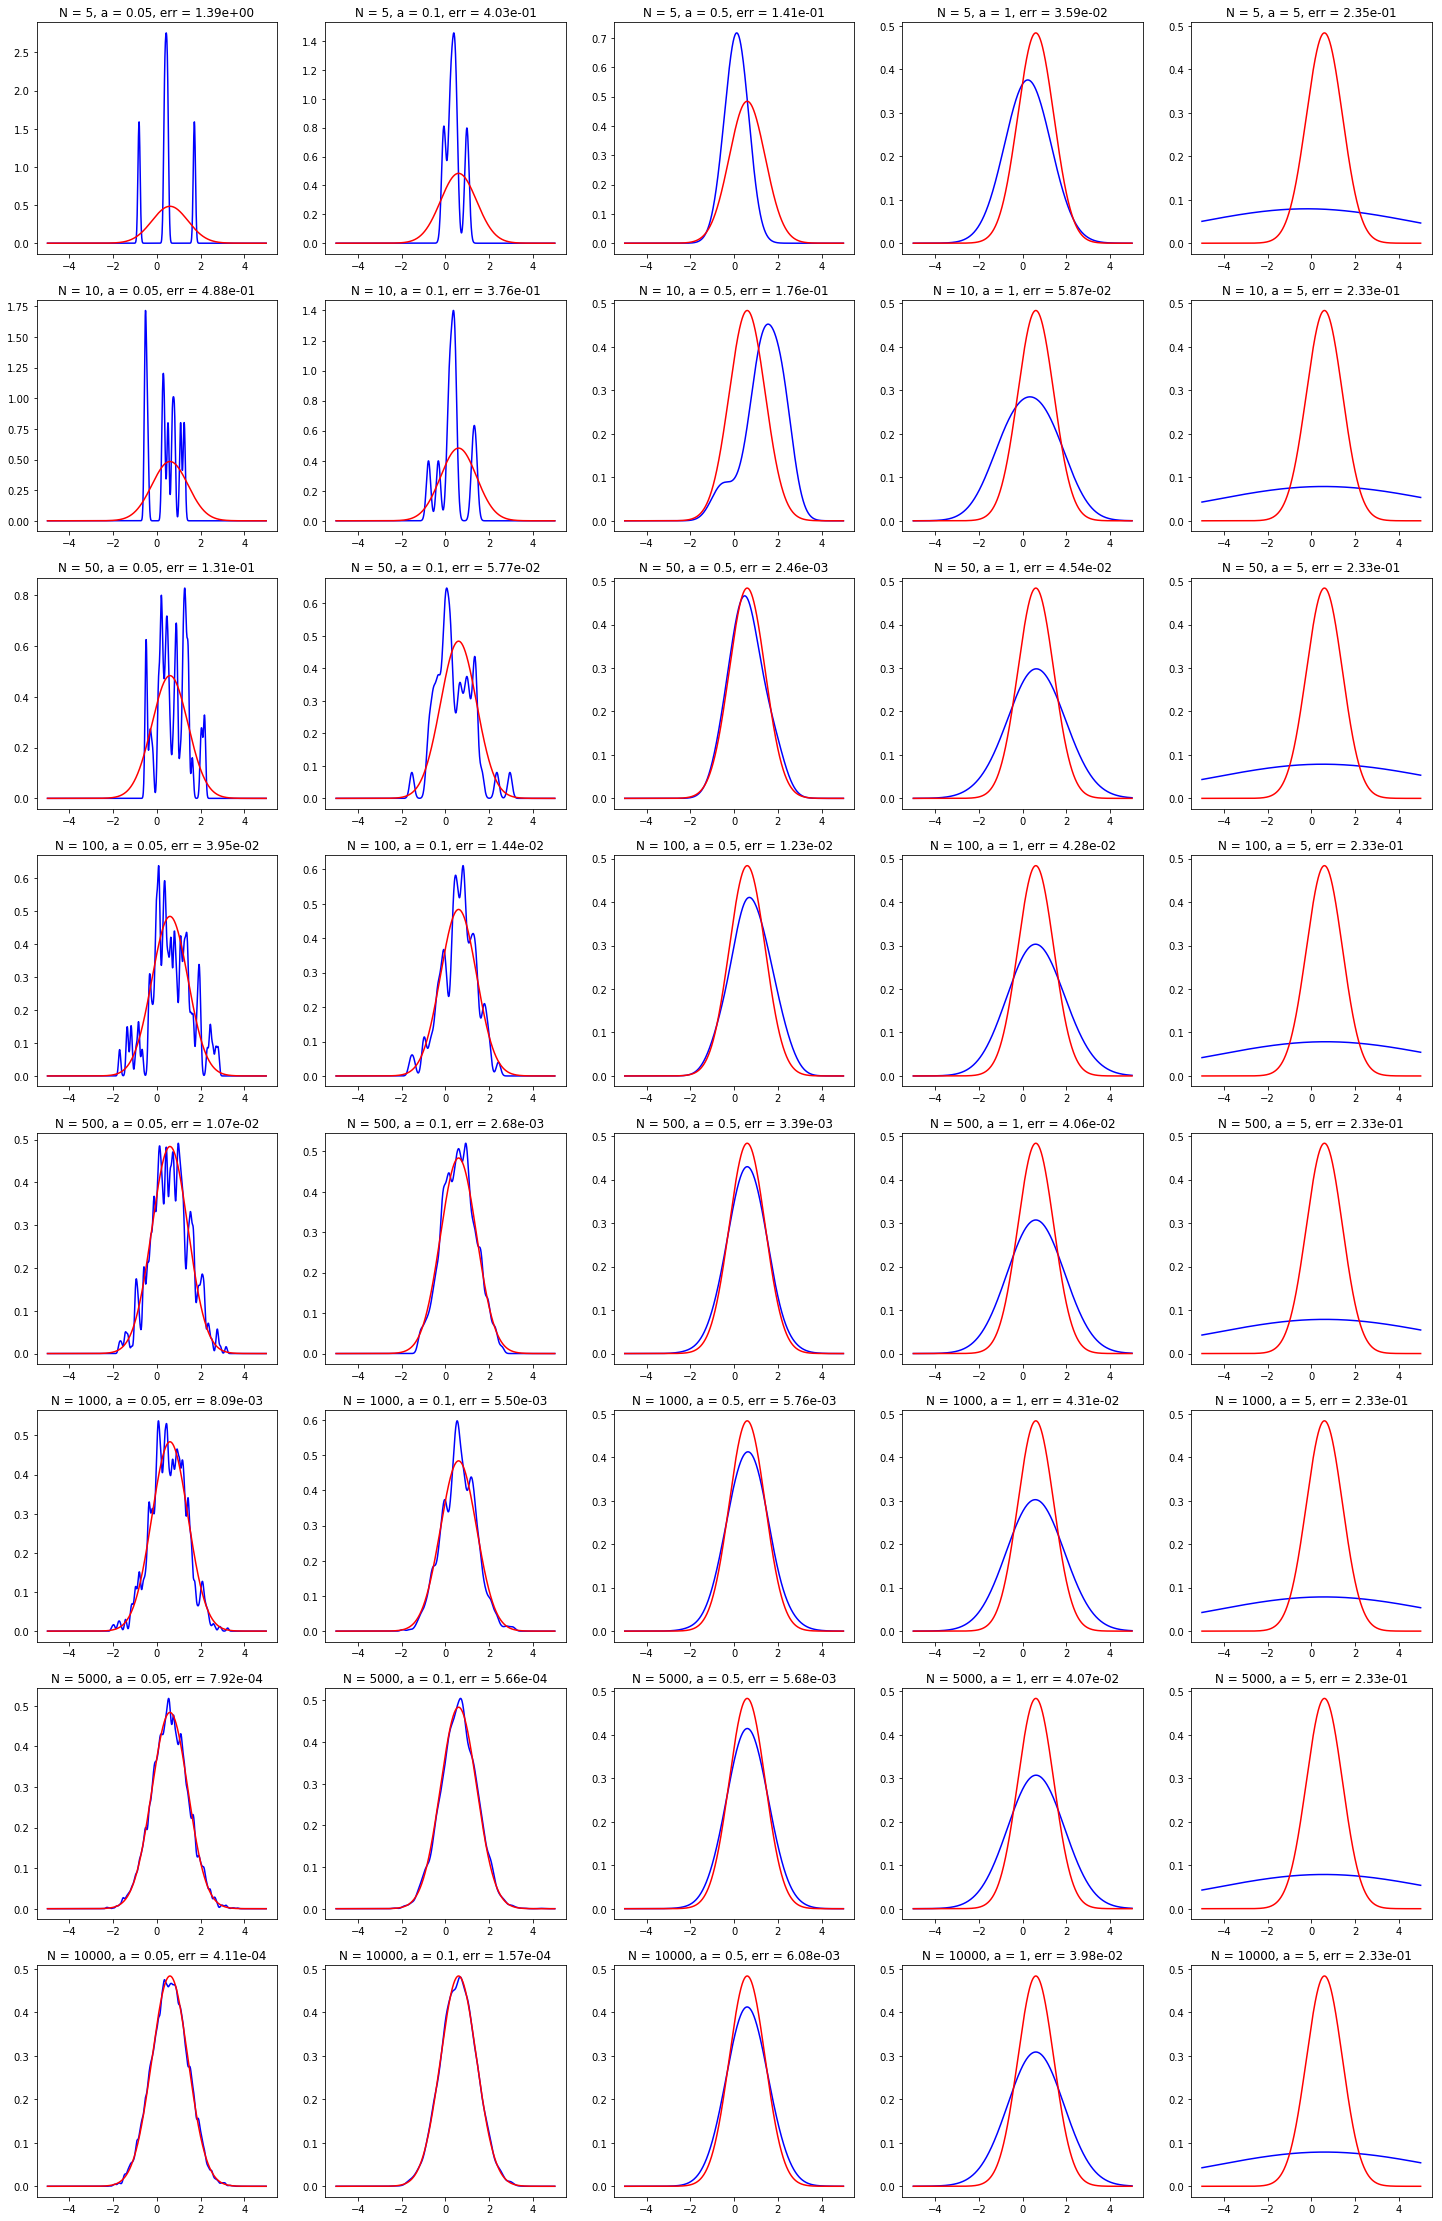

In [9]:
plt.rcParams["figure.figsize"] = [5 * len(A),5 * len(N)]
def PDF_norm(n,a):
    samples = sample(n)
    X = np.linspace(-5,5,num= int(1 + 1e3))
    Y = np.zeros(X.shape)
    for s in samples:
        Y += stats.norm.pdf(X,s,a)
    Y = Y / n
    return X,Y
for n in range(len(N)):
    for a in range(len(A)):
        plt.subplot(len(N),len(A),n * len(A) + a + 1)
        X,Y = PDF_norm(N[n],A[a])
        err = np.square(Y - stats.norm.pdf(X,mu,np.sqrt(sigma)))
        err = np.sum(err) * (X[1] - X[0])
        plt.plot(X,Y,'b')
        plt.plot(_X,_Y,'r')
        plt.title('N = {}, a = {}, err = {:.2e}'.format(N[n],A[a],err))
plt.show()

The error functioned is shown above, now we use numerial method to calc the $E(\epsilon(x))$ and $Var(\epsilon(x))$

In [10]:
string = 'Mean Value of Error\n N \\ a'
for a in A: string += '\t\t' + str(a)
print (string)

loop_num = 100
buf = []
for n in N:
    string = str(n) + '\t'
    for a in A:
        err = []
        for _ in range(loop_num):
            X,Y = PDF_norm(n,a)
            e = np.square(Y - stats.norm.pdf(X,mu,np.sqrt(sigma)))
            e = np.sum(e) * (X[1] - X[0])
            err.append(e)
        string += '\t' + '{:.3e}'.format(np.mean(err))
        buf.append(np.sqrt(np.var(err,ddof=1)))
    print (string)
    
idx = 0
string = 'Standard Variance of Error\n N \\ a'
for a in A: string += '\t\t' + str(a)
print (string)
for n in N:
    string = str(n) + '\t'
    for a in A:
        string += '\t' + '{:.3e}'.format(buf[idx])
        idx += 1
    print (string)

Mean Value of Error
 N \ a		0.05		0.1		0.5		1		5
5		1.044e+00	5.087e-01	6.220e-02	5.797e-02	2.329e-01
10		5.111e-01	2.669e-01	3.360e-02	4.525e-02	2.330e-01
50		1.090e-01	4.626e-02	1.197e-02	4.138e-02	2.330e-01
100		5.011e-02	2.346e-02	8.606e-03	4.091e-02	2.330e-01
500		1.106e-02	5.058e-03	6.092e-03	4.061e-02	2.330e-01
1000		5.296e-03	2.473e-03	5.964e-03	4.058e-02	2.330e-01
5000		1.044e-03	4.970e-04	5.876e-03	4.029e-02	2.330e-01
10000		5.533e-04	2.603e-04	5.779e-03	4.041e-02	2.330e-01
Standard Variance of Error
 N \ a		0.05		0.1		0.5		1		5
5		2.284e-01	1.721e-01	4.838e-02	3.265e-02	7.747e-04
10		1.510e-01	1.175e-01	3.209e-02	1.797e-02	4.937e-04
50		2.869e-02	2.026e-02	7.809e-03	7.813e-03	2.633e-04
100		1.271e-02	9.754e-03	4.908e-03	5.053e-03	1.675e-04
500		2.930e-03	2.614e-03	2.102e-03	2.053e-03	7.086e-05
1000		1.490e-03	9.955e-04	1.245e-03	1.568e-03	5.540e-05
5000		3.028e-04	2.082e-04	6.178e-04	7.102e-04	2.638e-05
10000		1.783e-04	1.128e-04	4.353e-04	5.110e-04	1.653e-05


We can find out that the $\sigma_w = a = 0.1$ is OK, in fact, $a = 0.05,0.1,0.5$ is also fine, while $a = 0.5$ is better (i.e. more smooth, etc) for minor data set

### Try other distributions

We write a general test code to try other distributions, parameter $a$ is used to define the width of window (of other similar parameters) of the distributions

In [11]:
def PDF_x(name):
    print (name + ' distribution:')
    plt.rcParams["figure.figsize"] = [5 * len(A),5 * len(N)]
    def _PDF(n,a):
        samples = sample(n)
        X = np.linspace(-5,5,num= int(1 + 1e3))
        Y = np.zeros(X.shape)
        for s in samples:
            
            if name == 'norm':
                Y += stats.norm.pdf(X,s,a)
            if name == 'tri':
                Y += stats.triang.pdf(X,0.5,loc = s - 0.5 * a,scale = a)
            if name == 'uni':
                Y += stats.uniform.pdf(X,loc = s - 0.5 * a,scale = a)
            if name == 'exp':
                Y += stats.expon.pdf(np.abs(X-s),loc = 0,scale = a) / 2 # bi-exp
            if name == 'cauchy':
                Y += stats.cauchy.pdf(X,loc = s, scale = a)
            if name == 'cosine':
                Y += stats.cosine.pdf(X,loc = s, scale = a)
                
        Y = Y / n
        return X,Y
    for n in range(len(N)):
        for a in range(len(A)):
            plt.subplot(len(N),len(A),n * len(A) + a + 1)
            X,Y = _PDF(N[n],A[a])
            err = np.square(Y - stats.norm.pdf(X,mu,np.sqrt(sigma)))
            err = np.sum(err) * (X[1] - X[0])
            plt.plot(X,Y,'b')
            plt.plot(_X,_Y,'r')
            plt.title('N = {}, a = {}, err = {:.2e}'.format(N[n],A[a],err))
    plt.show()
    print('-----')

We have tried 6 different kinds of distributions, finding that:

- For almost all of the kernel function, when $N > 5000$, $p_n(x)$ almost the same with the original PDF function, with the width of the kernel $a < 0.1$, this is mainly because that the data is so rich that the kernel function is almost like $\delta$ function

- The larger $a$, e.g. $a = 5$, tend to give a more smooth PDF function, which works exteremely well for the minor data set,while the smaller $a$ is more likely to generate a exact PDF function if the data set is large enough, though they seems much 'ugly' in the minor data set

- Since we can find that the original PDF is a unimodal function, it might be true that the unimodal kernel function works well especially in the minor data set.

In a few words, the 'sharper', 'thinner' kernel function is more apt to the larger dataset, while the opposite is more apt to smaller dataset, which is to say, the kernel function should be decided according to the number of data point

In our situation, we got the perference table as following

|N|kernel function|$a$|
|----|----|----|----|
|5|cosine|0.5|
|10|cosine|0.5|
|50|norm (OR tri)|0.5 (OR 1)|
|100|norm | 0.5|
|500|tri, uni (OR norm)|0.5 (OR 0.1)|
|1000|norm|0.1
|5000|norm (almost no difference)|0.1|
|10000|norm (almost no difference)|0.1|

For most of the case, normal distribution with $a = 0.1\sim0.5$ should be fine

The expression of PDF of the kernel functions should be the following:

$$\text{normalize stochastic variables: }y = \frac{x-x_i}{a}$$

$$\text{norm: }h(y) = \frac{1}{\sqrt{2\pi}}\exp(-0.5y^2)$$

$$\text{tri: }h(y) = 1 - |y|, y\in[-1,1]$$

$$\text{uni: }h(y) = 1, y\in[-0.5,0.5]$$

$$\text{exp: }h(y) = \frac{exp(-|y|)}{2}$$

$$\text{cauchy: }h(y) = \frac1{\pi(1+y^2)}$$

$$\text{cosine: }h(y) = \frac{1 + \cos(y)}{2\pi}, y \in[-\pi,\pi]$$

norm distribution:


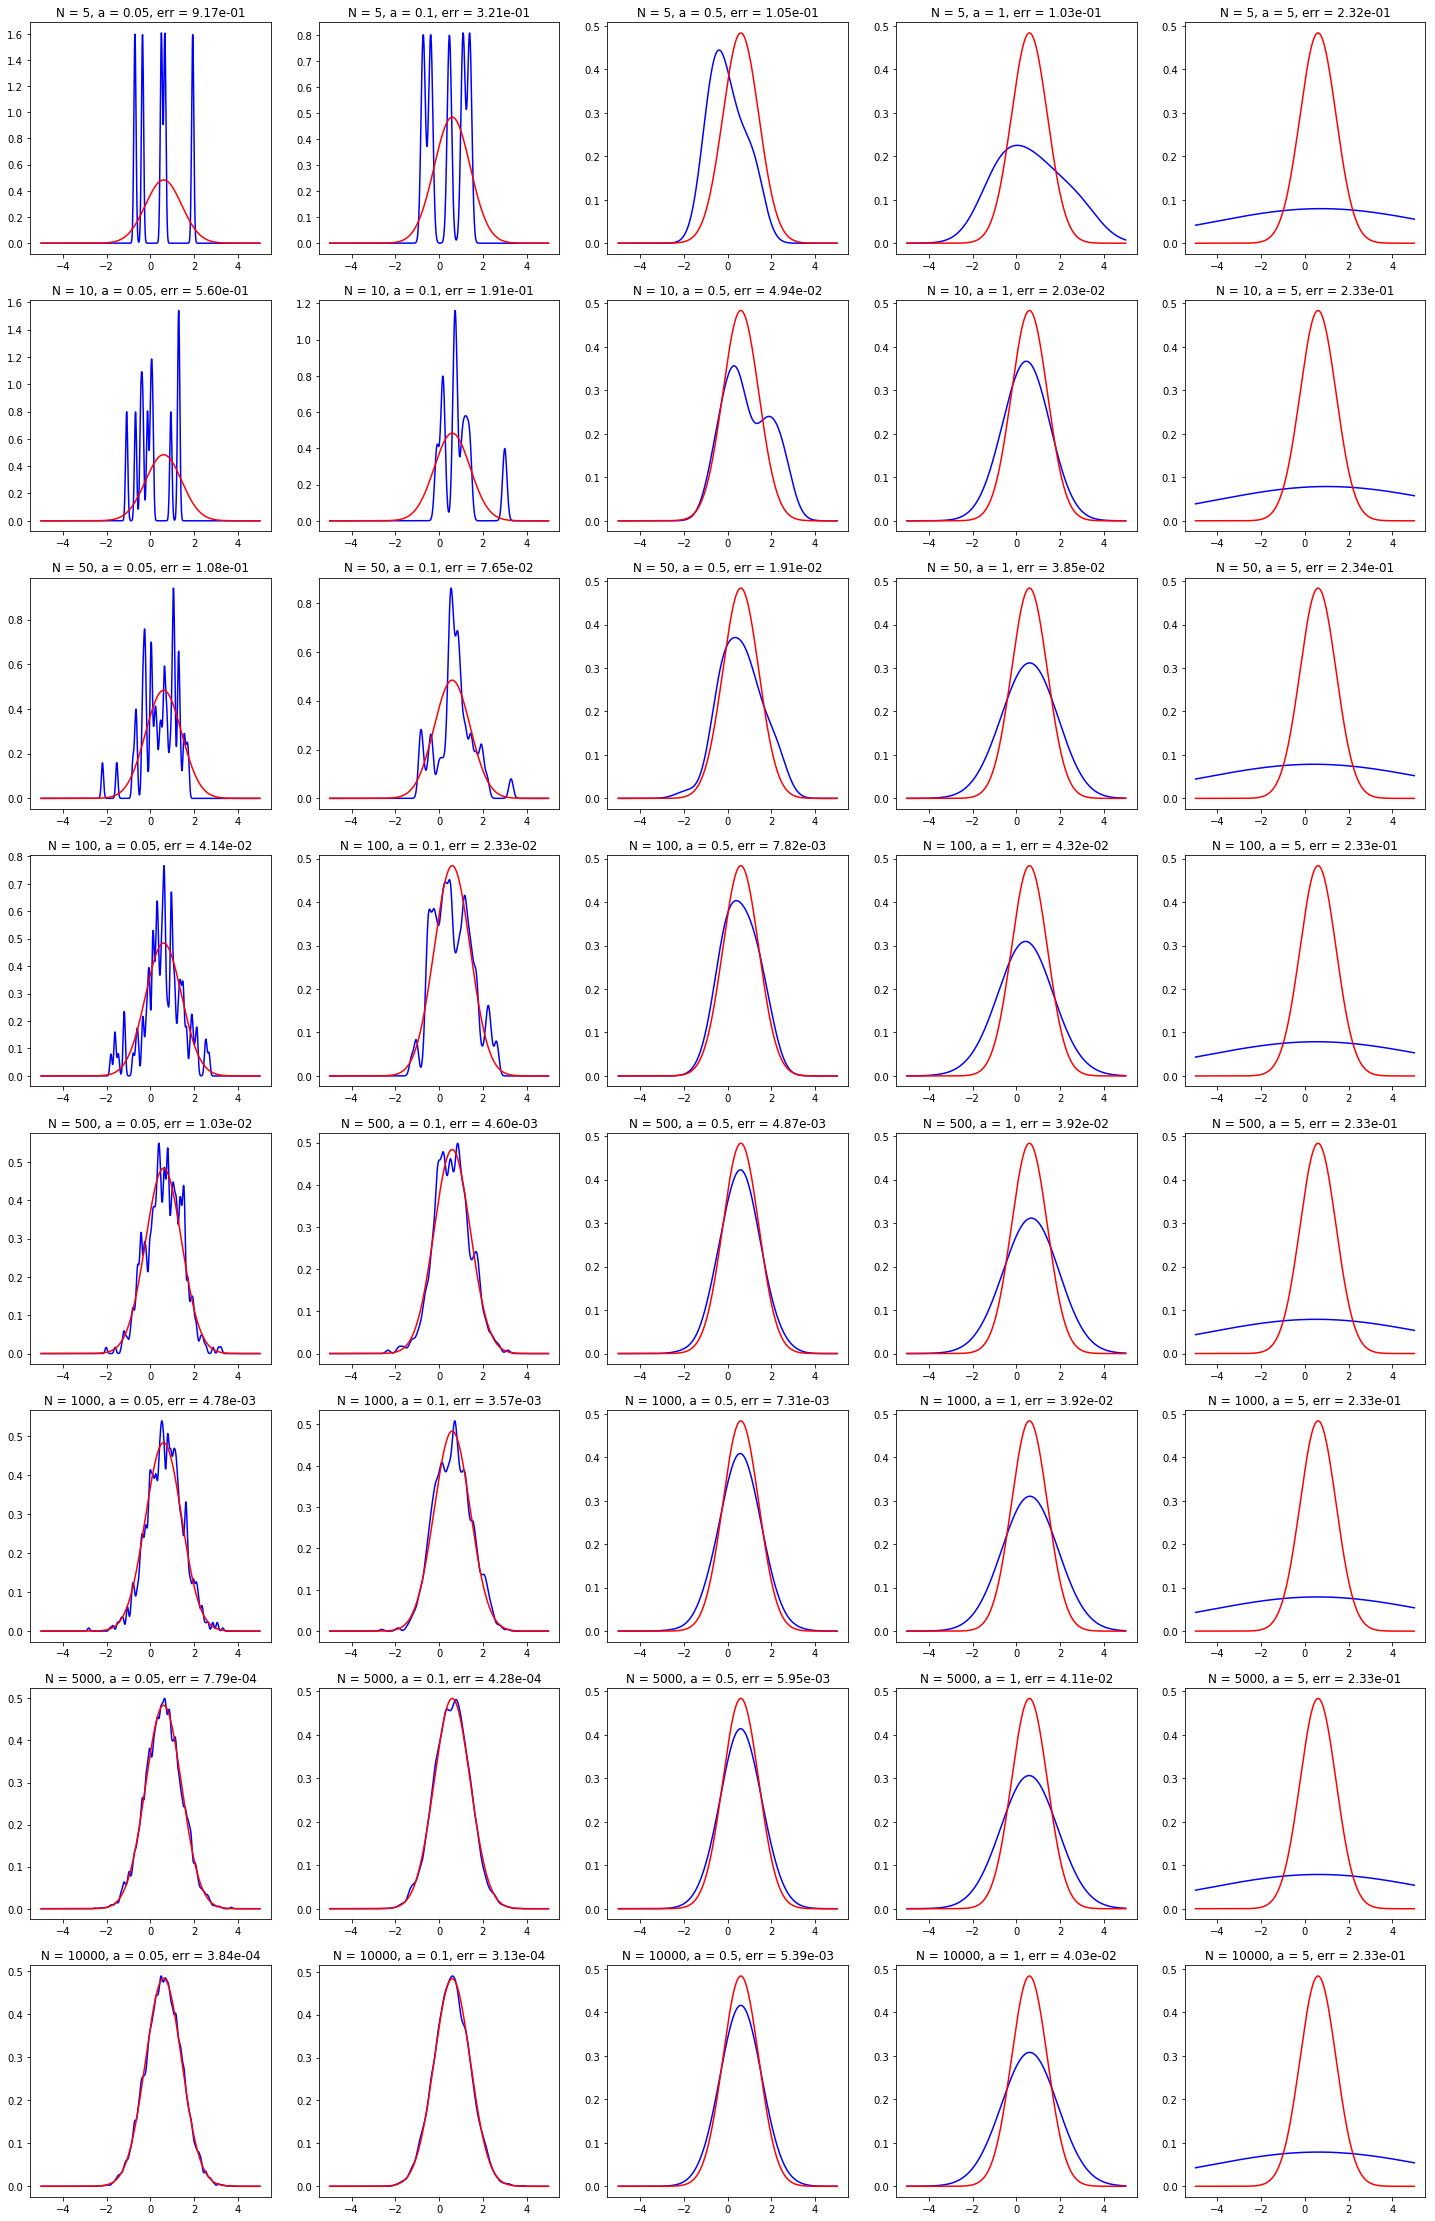

-----
uni distribution:


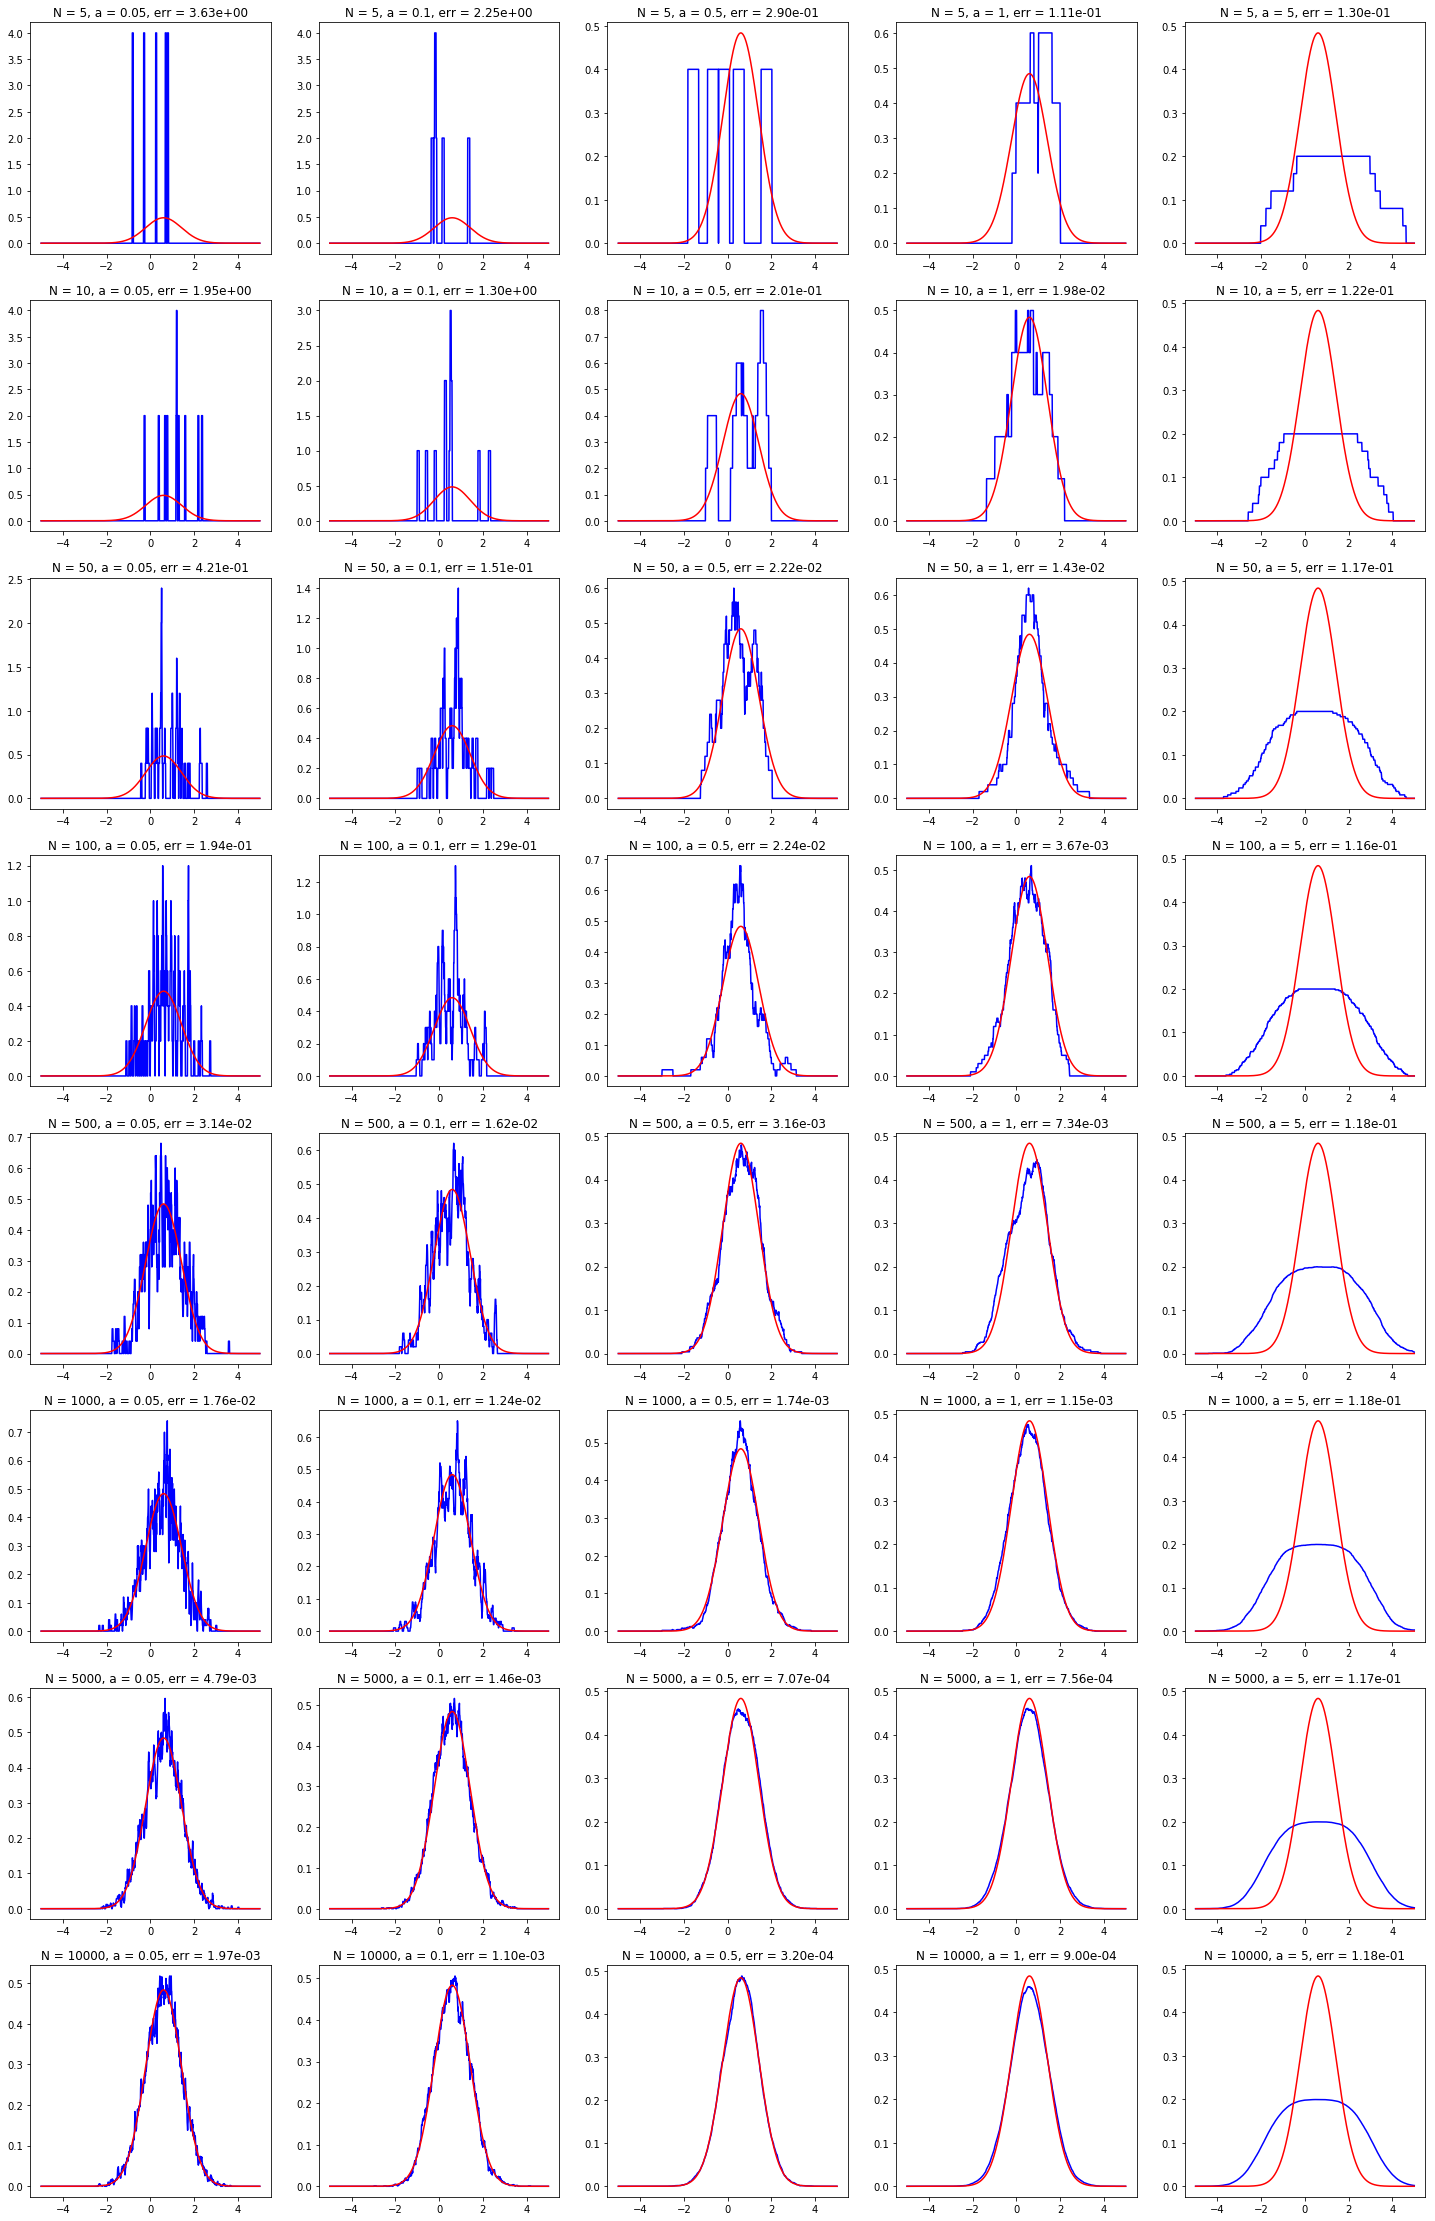

-----
tri distribution:


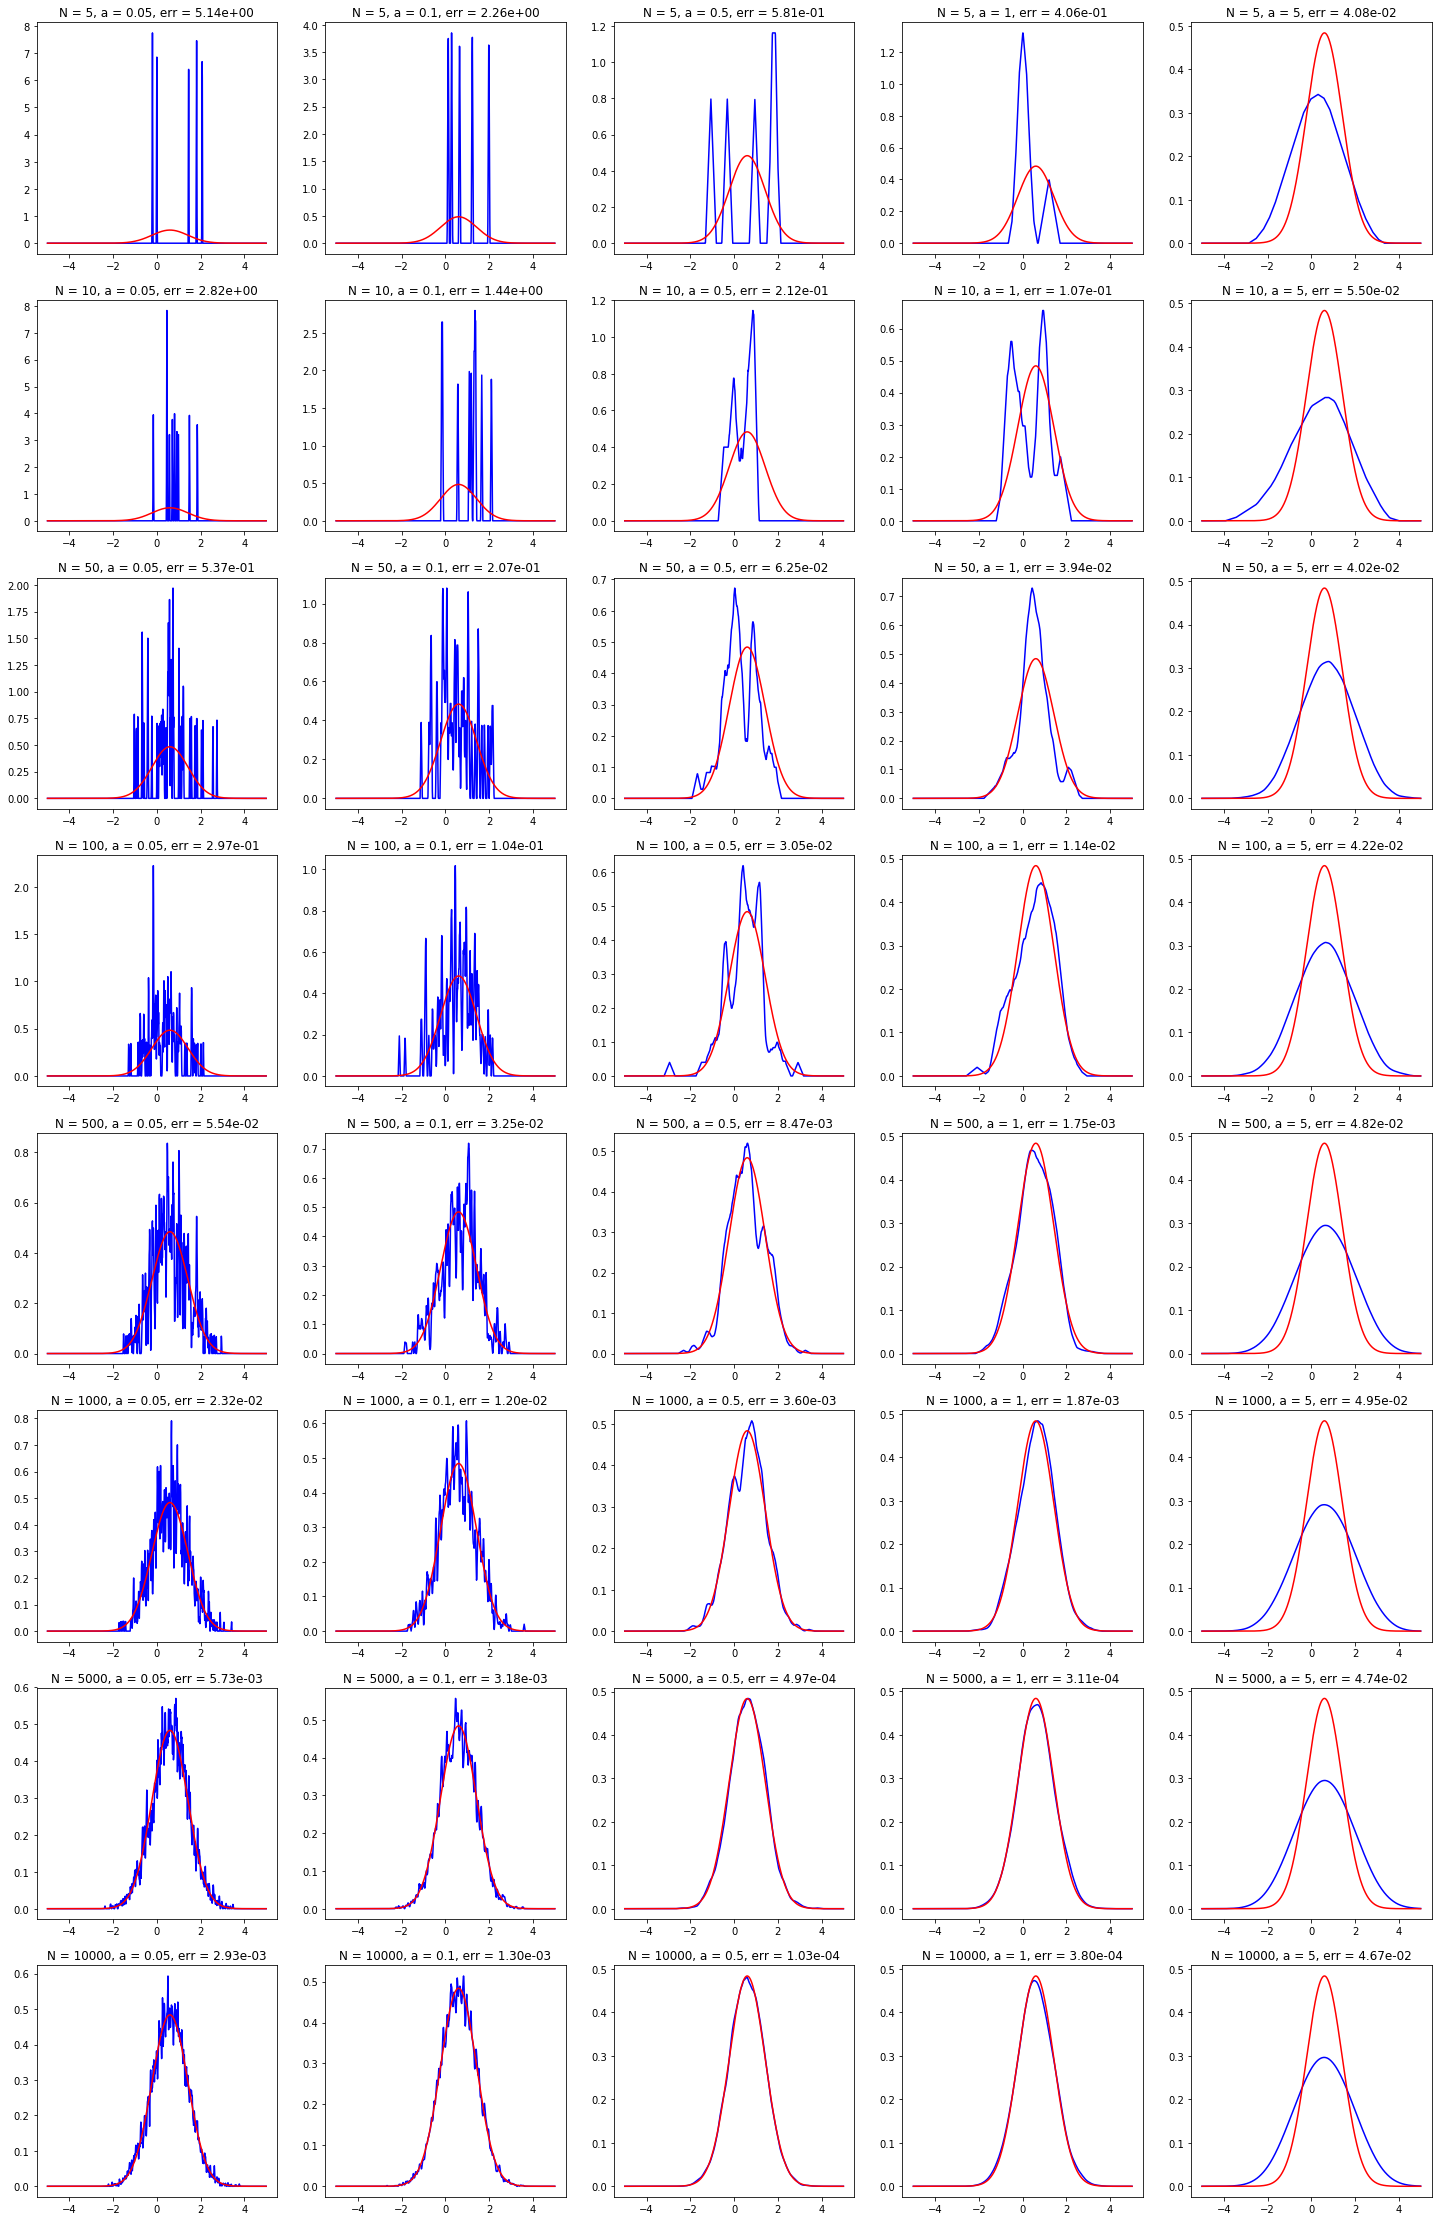

-----
exp distribution:


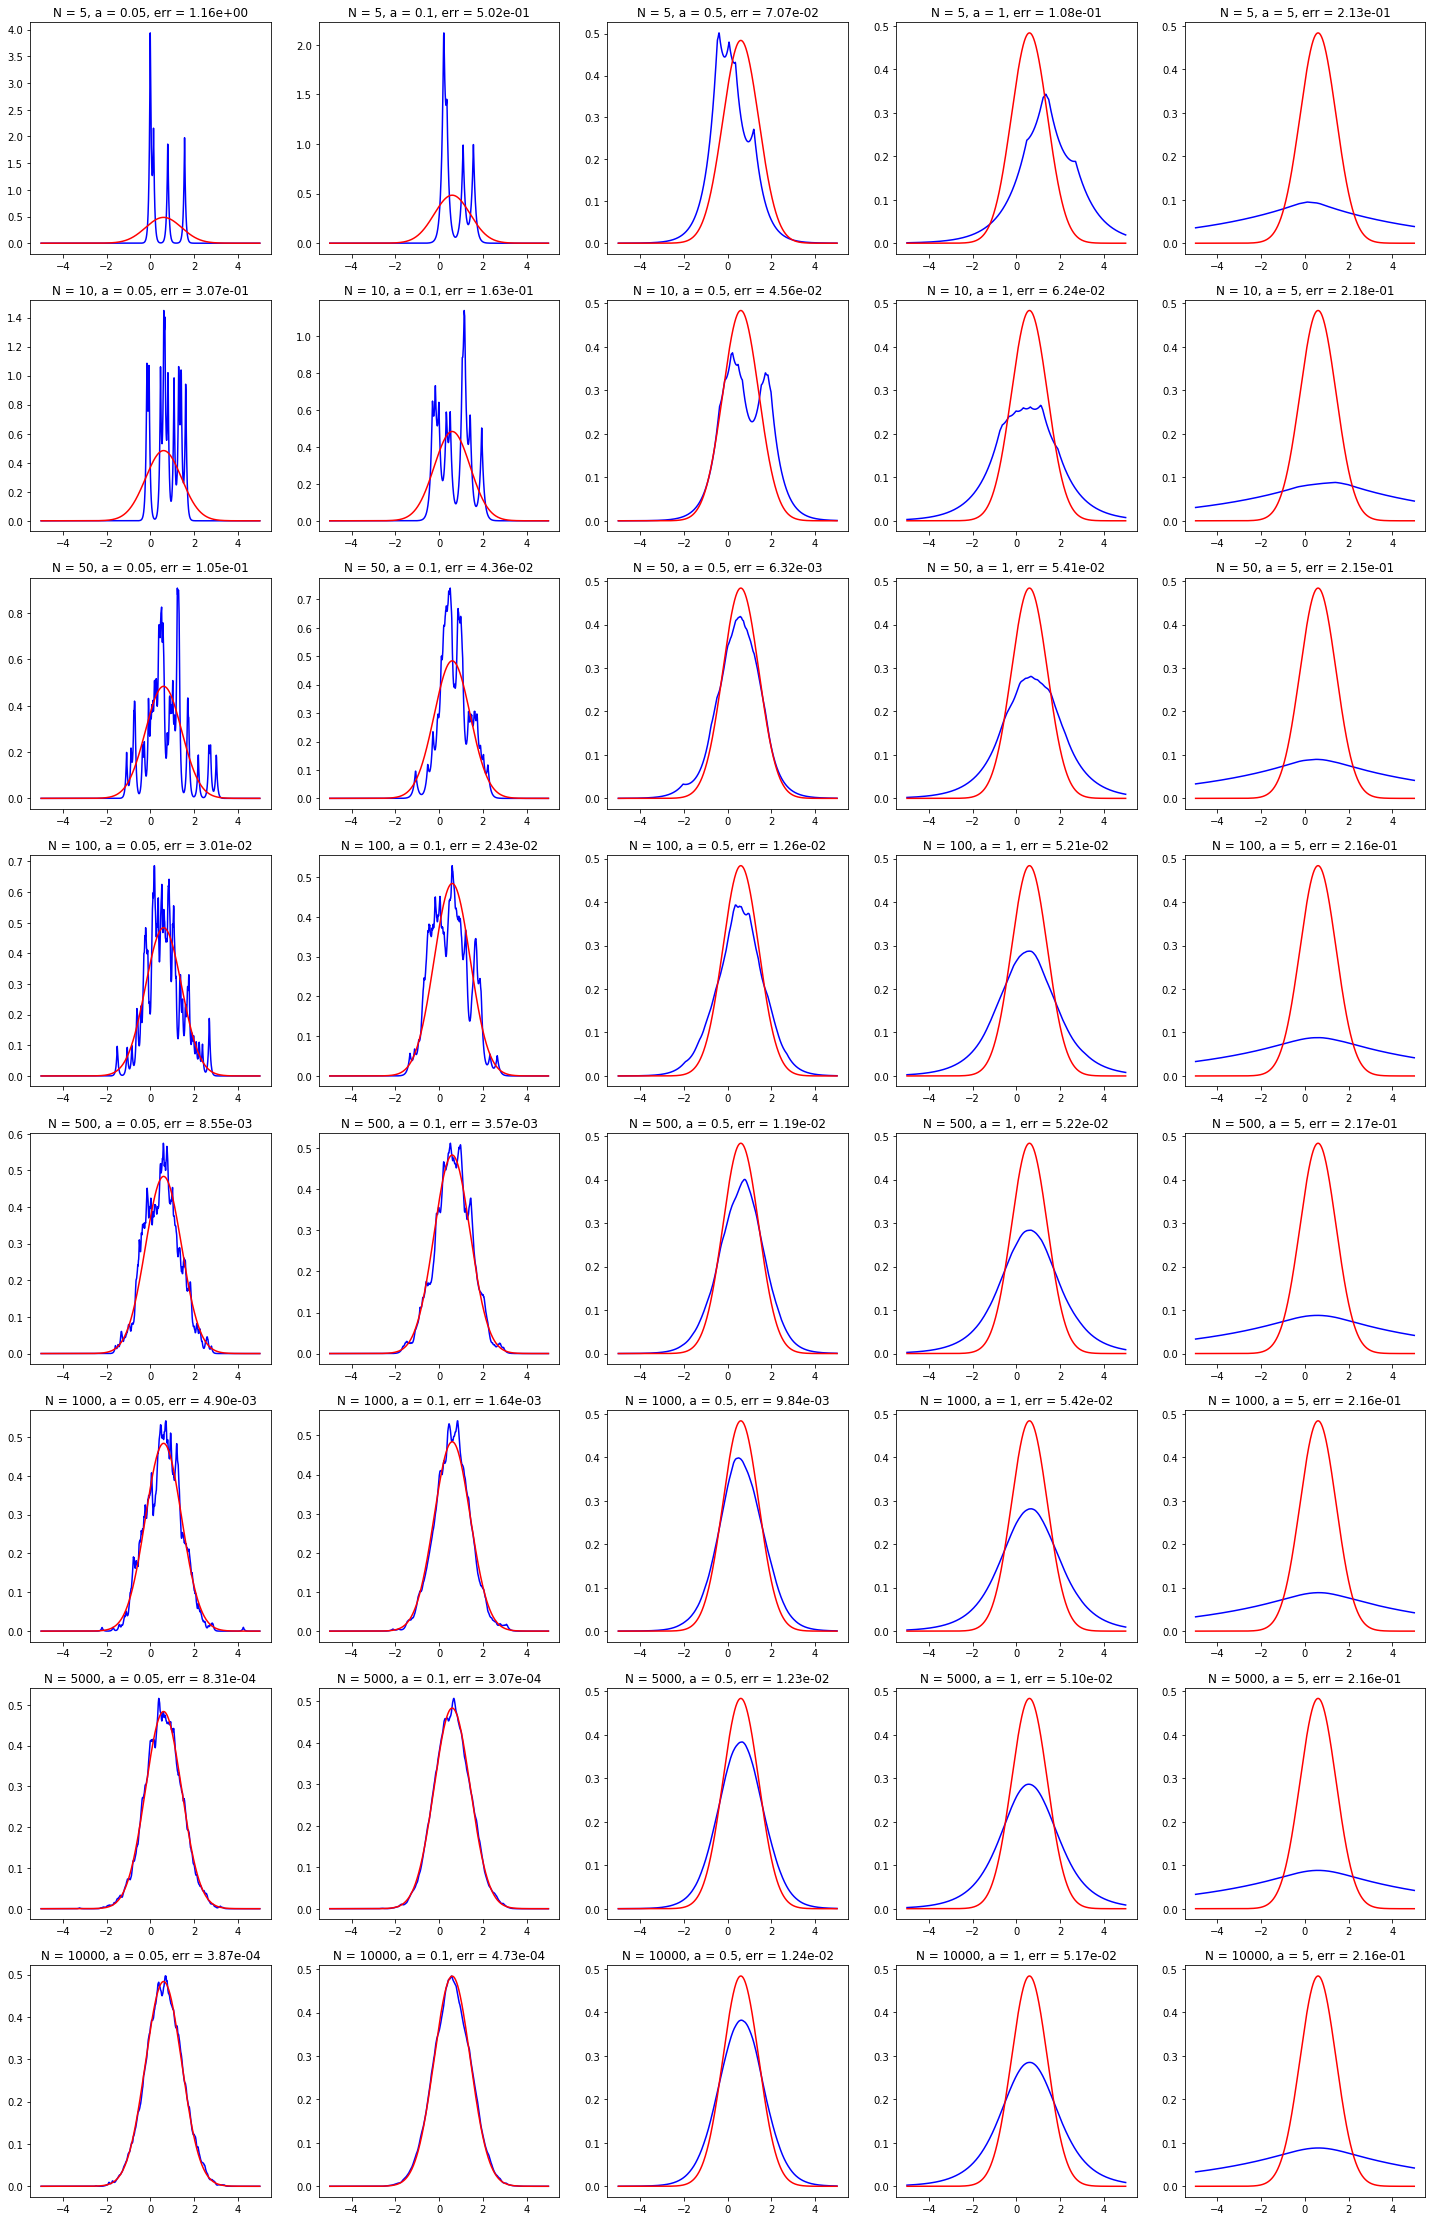

-----
cauchy distribution:


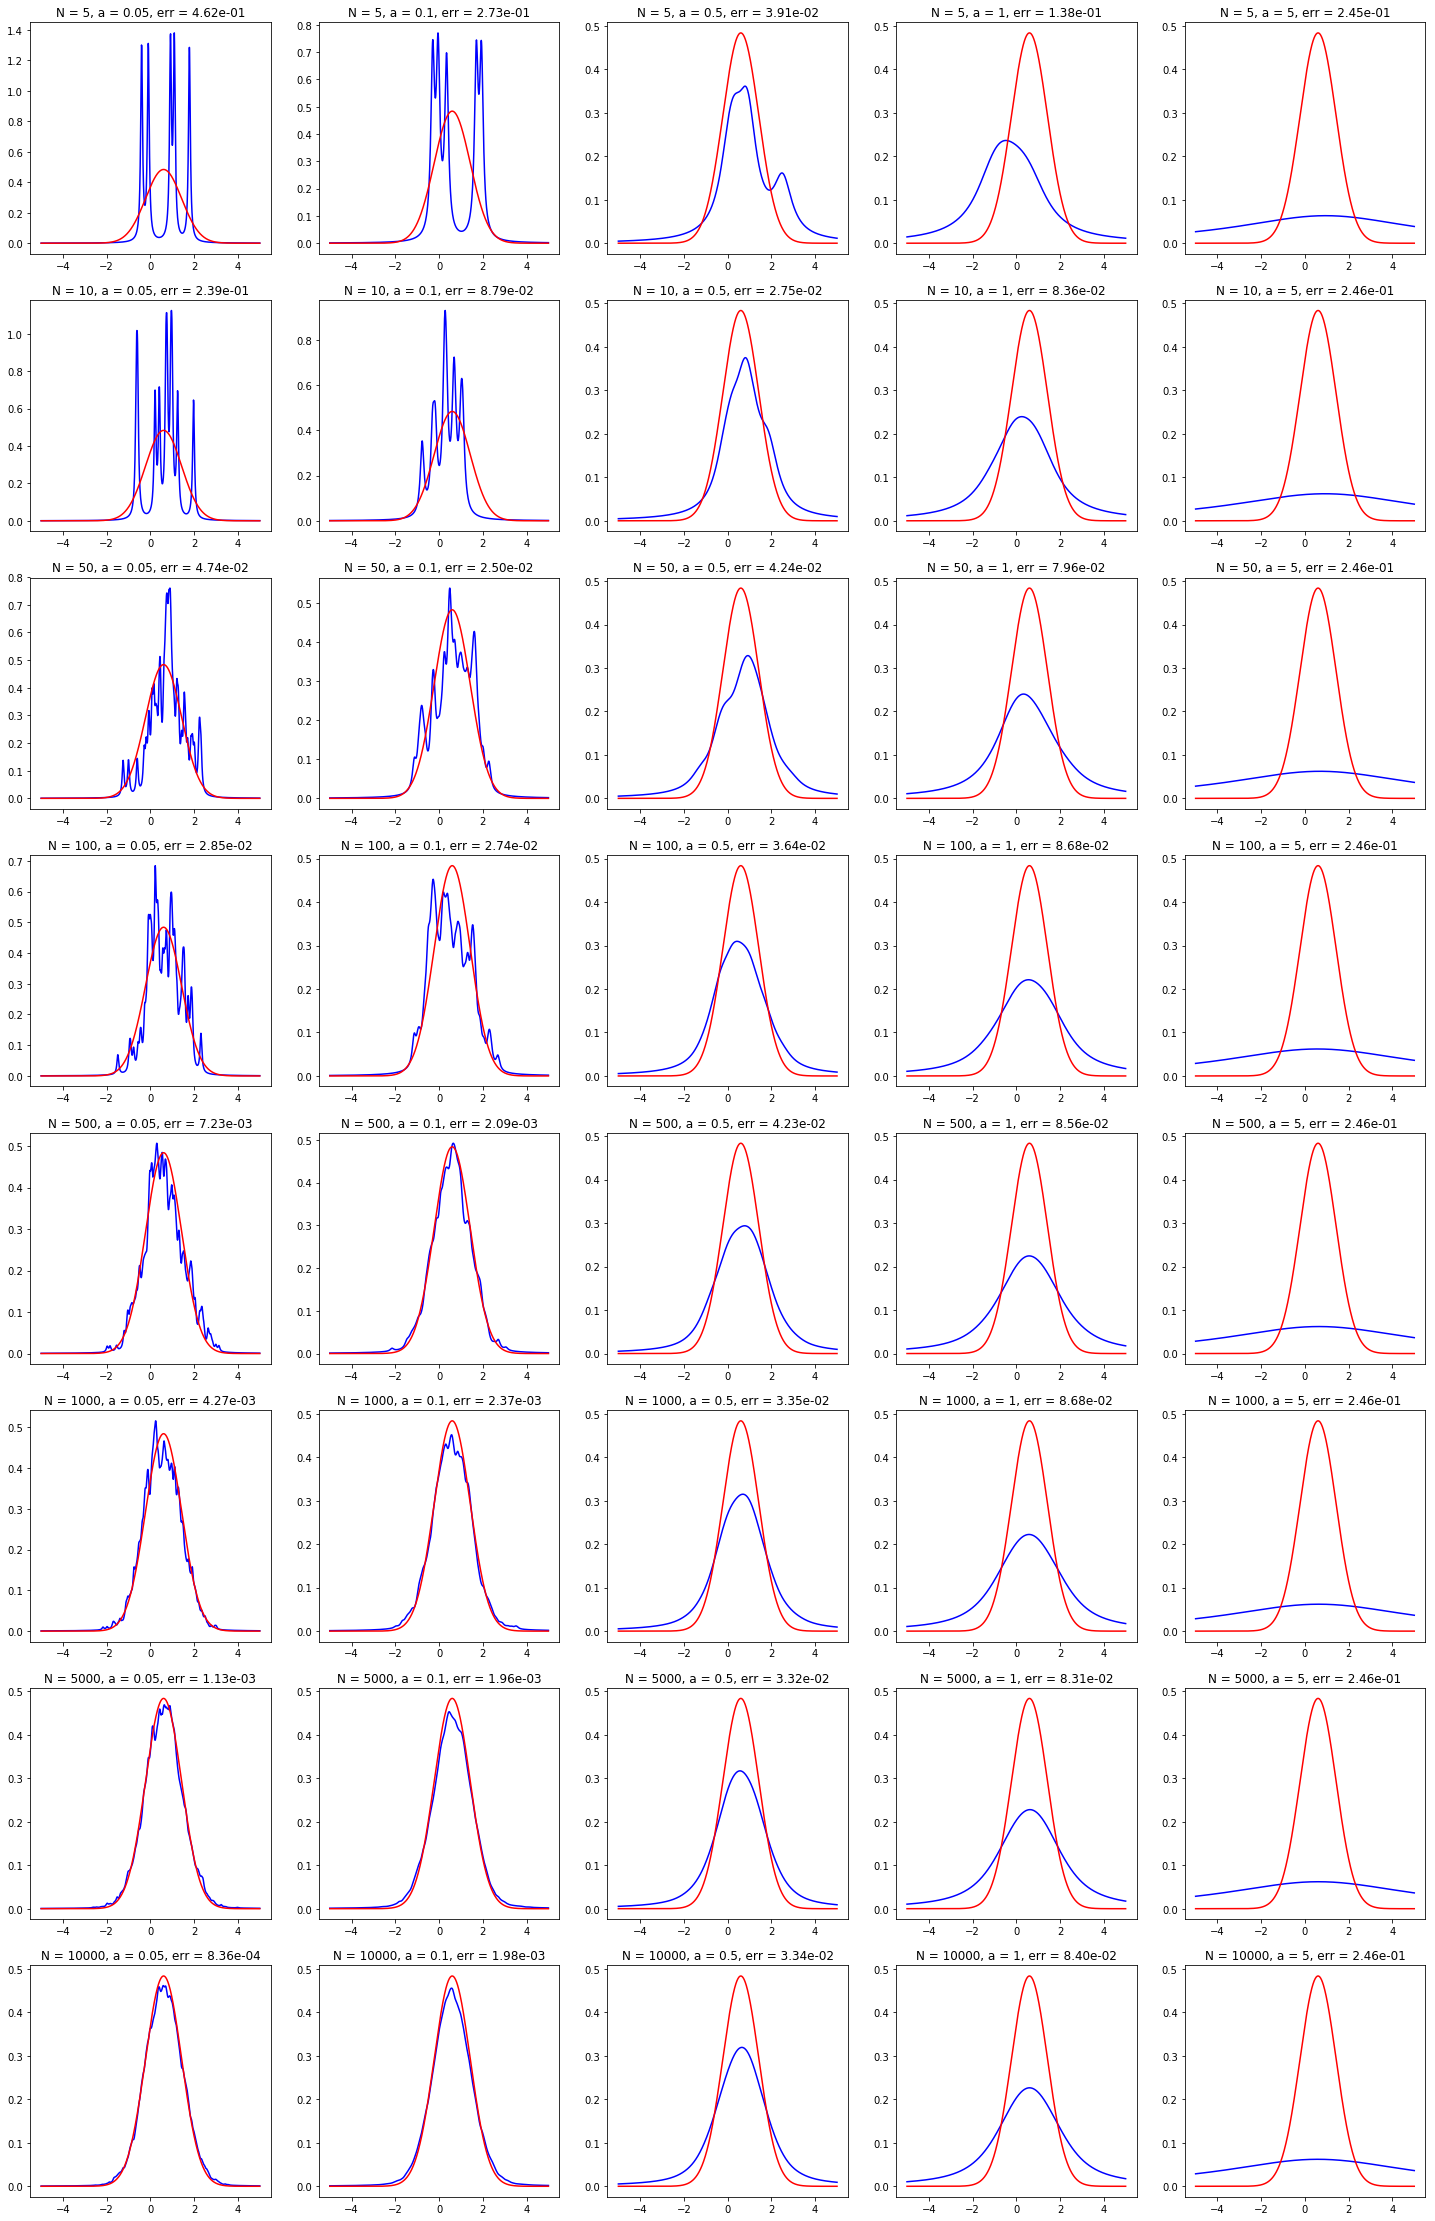

-----
cosine distribution:


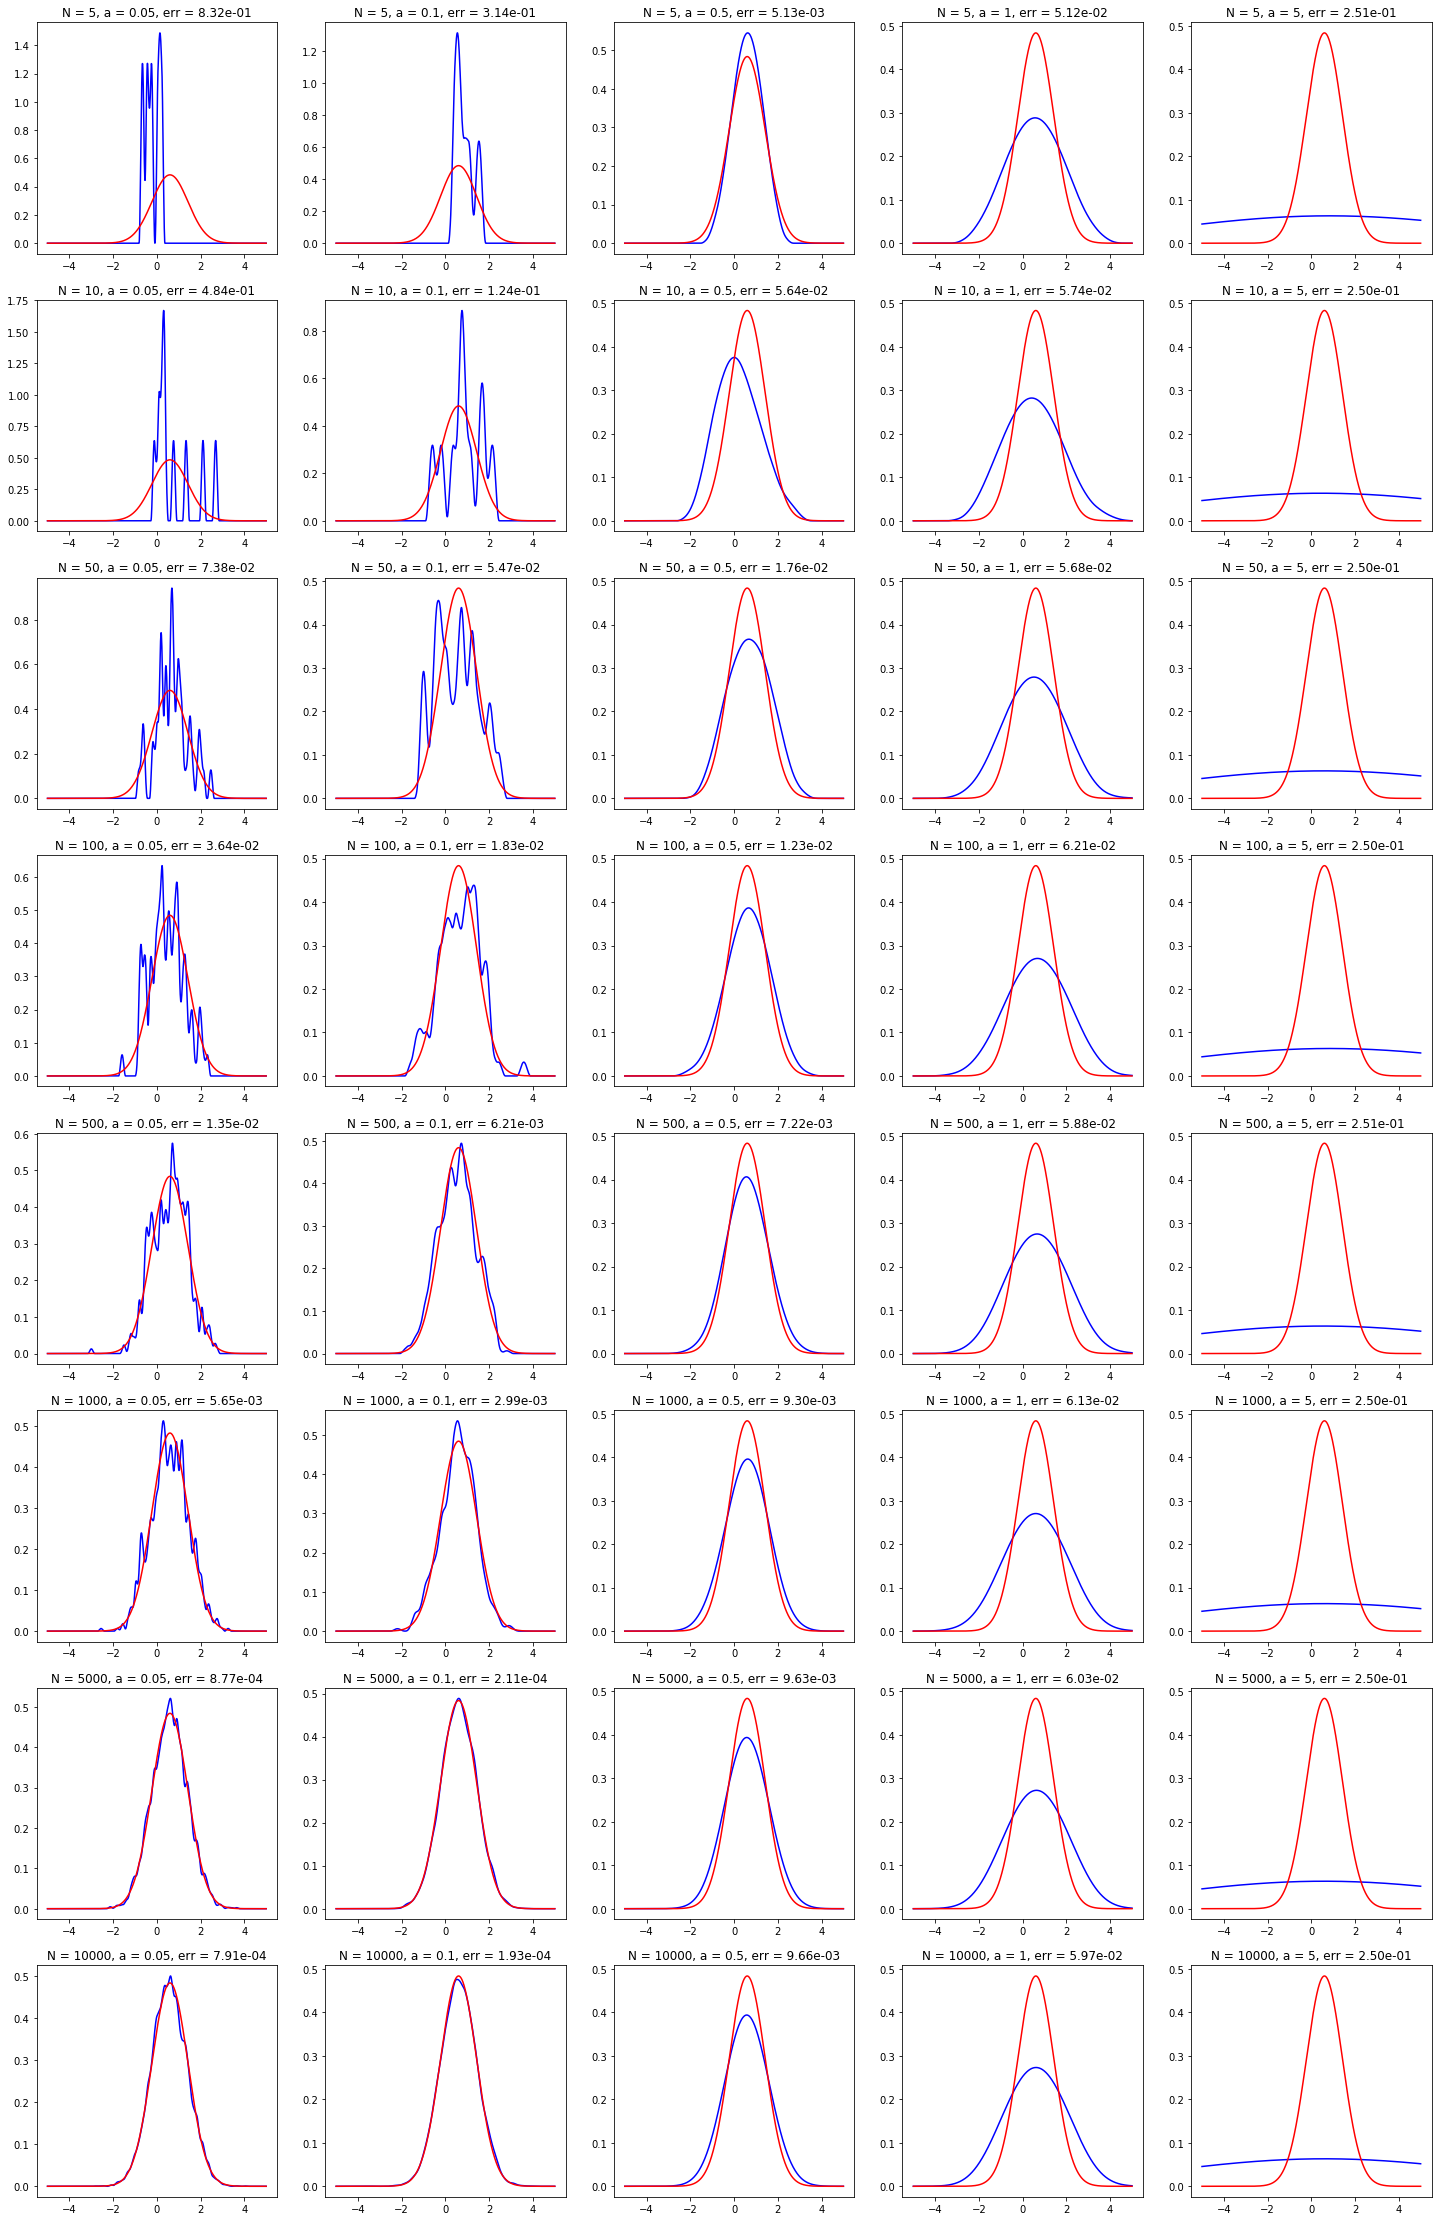

-----


In [12]:
names = ['norm','uni','tri','exp','cauchy','cosine']
for name in names:
    PDF_x(name)